# Analysis of semantic clustering

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
import seaborn as sns
from psifr import fr

Load the data and merge study and recall.

In [2]:
raw = fr.sample_data("Morton2013")
raw["category"] = raw["category"].astype("category").cat.as_ordered()
data = fr.merge_free_recall(raw, list_keys=["list_type"], study_keys=["category"])

Load semantic similarity estimates for each pair of items in the stimulus pool. Also, look up the index of each item in the stimulus pool.

In [3]:
items, distances = fr.sample_distances("Morton2013")
data["item_index"] = fr.pool_index(data["item"], items)
fr.filter_data(data, subjects=1, lists=1)

,subject,list,item,input,output,study,recall,repeat,intrusion,list_type,category,prior_list,prior_input,item_index
0,1,1,TOWEL,1.0,13.0,True,True,0,False,pure,obj,NaN,NaN,742
1,1,1,LADLE,2.0,NaN,True,False,0,False,pure,obj,NaN,NaN,630
2,1,1,THERMOS,3.0,NaN,True,False,0,False,pure,obj,NaN,NaN,734
3,1,1,LEGO,4.0,18.0,True,True,0,False,pure,obj,NaN,NaN,636
4,1,1,BACKPACK,5.0,10.0,True,True,0,False,pure,obj,NaN,NaN,520
5,1,1,JACKHAMMER,6.0,7.0,True,True,0,False,pure,obj,NaN,NaN,620
6,1,1,LANTERN,7.0,NaN,True,False,0,False,pure,obj,NaN,NaN,632
7,1,1,DOORKNOB,8.0,11.0,True,True,0,False,pure,obj,NaN,NaN,575
8,1,1,SHOVEL,9.0,9.0,True,True,0,False,pure,obj,NaN,NaN,707
9,1,1,SHOVEL,9.0,19.0,False,True,1,False,pure,obj,NaN,NaN,707


Define semantic similarity bins and calculate response probabilities by bin.

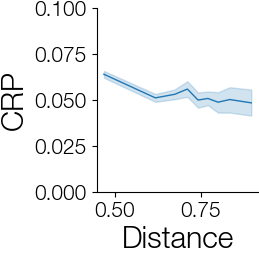

In [4]:
edges = np.percentile(squareform(distances), np.linspace(1, 99, 10))
pure = data.query("list_type == 'pure'")
crp = fr.distance_crp(pure, "item_index", distances, edges, count_unique=False)
g = fr.plot_distance_crp(crp, min_samples=10)
g.set(ylim=(0, .1));

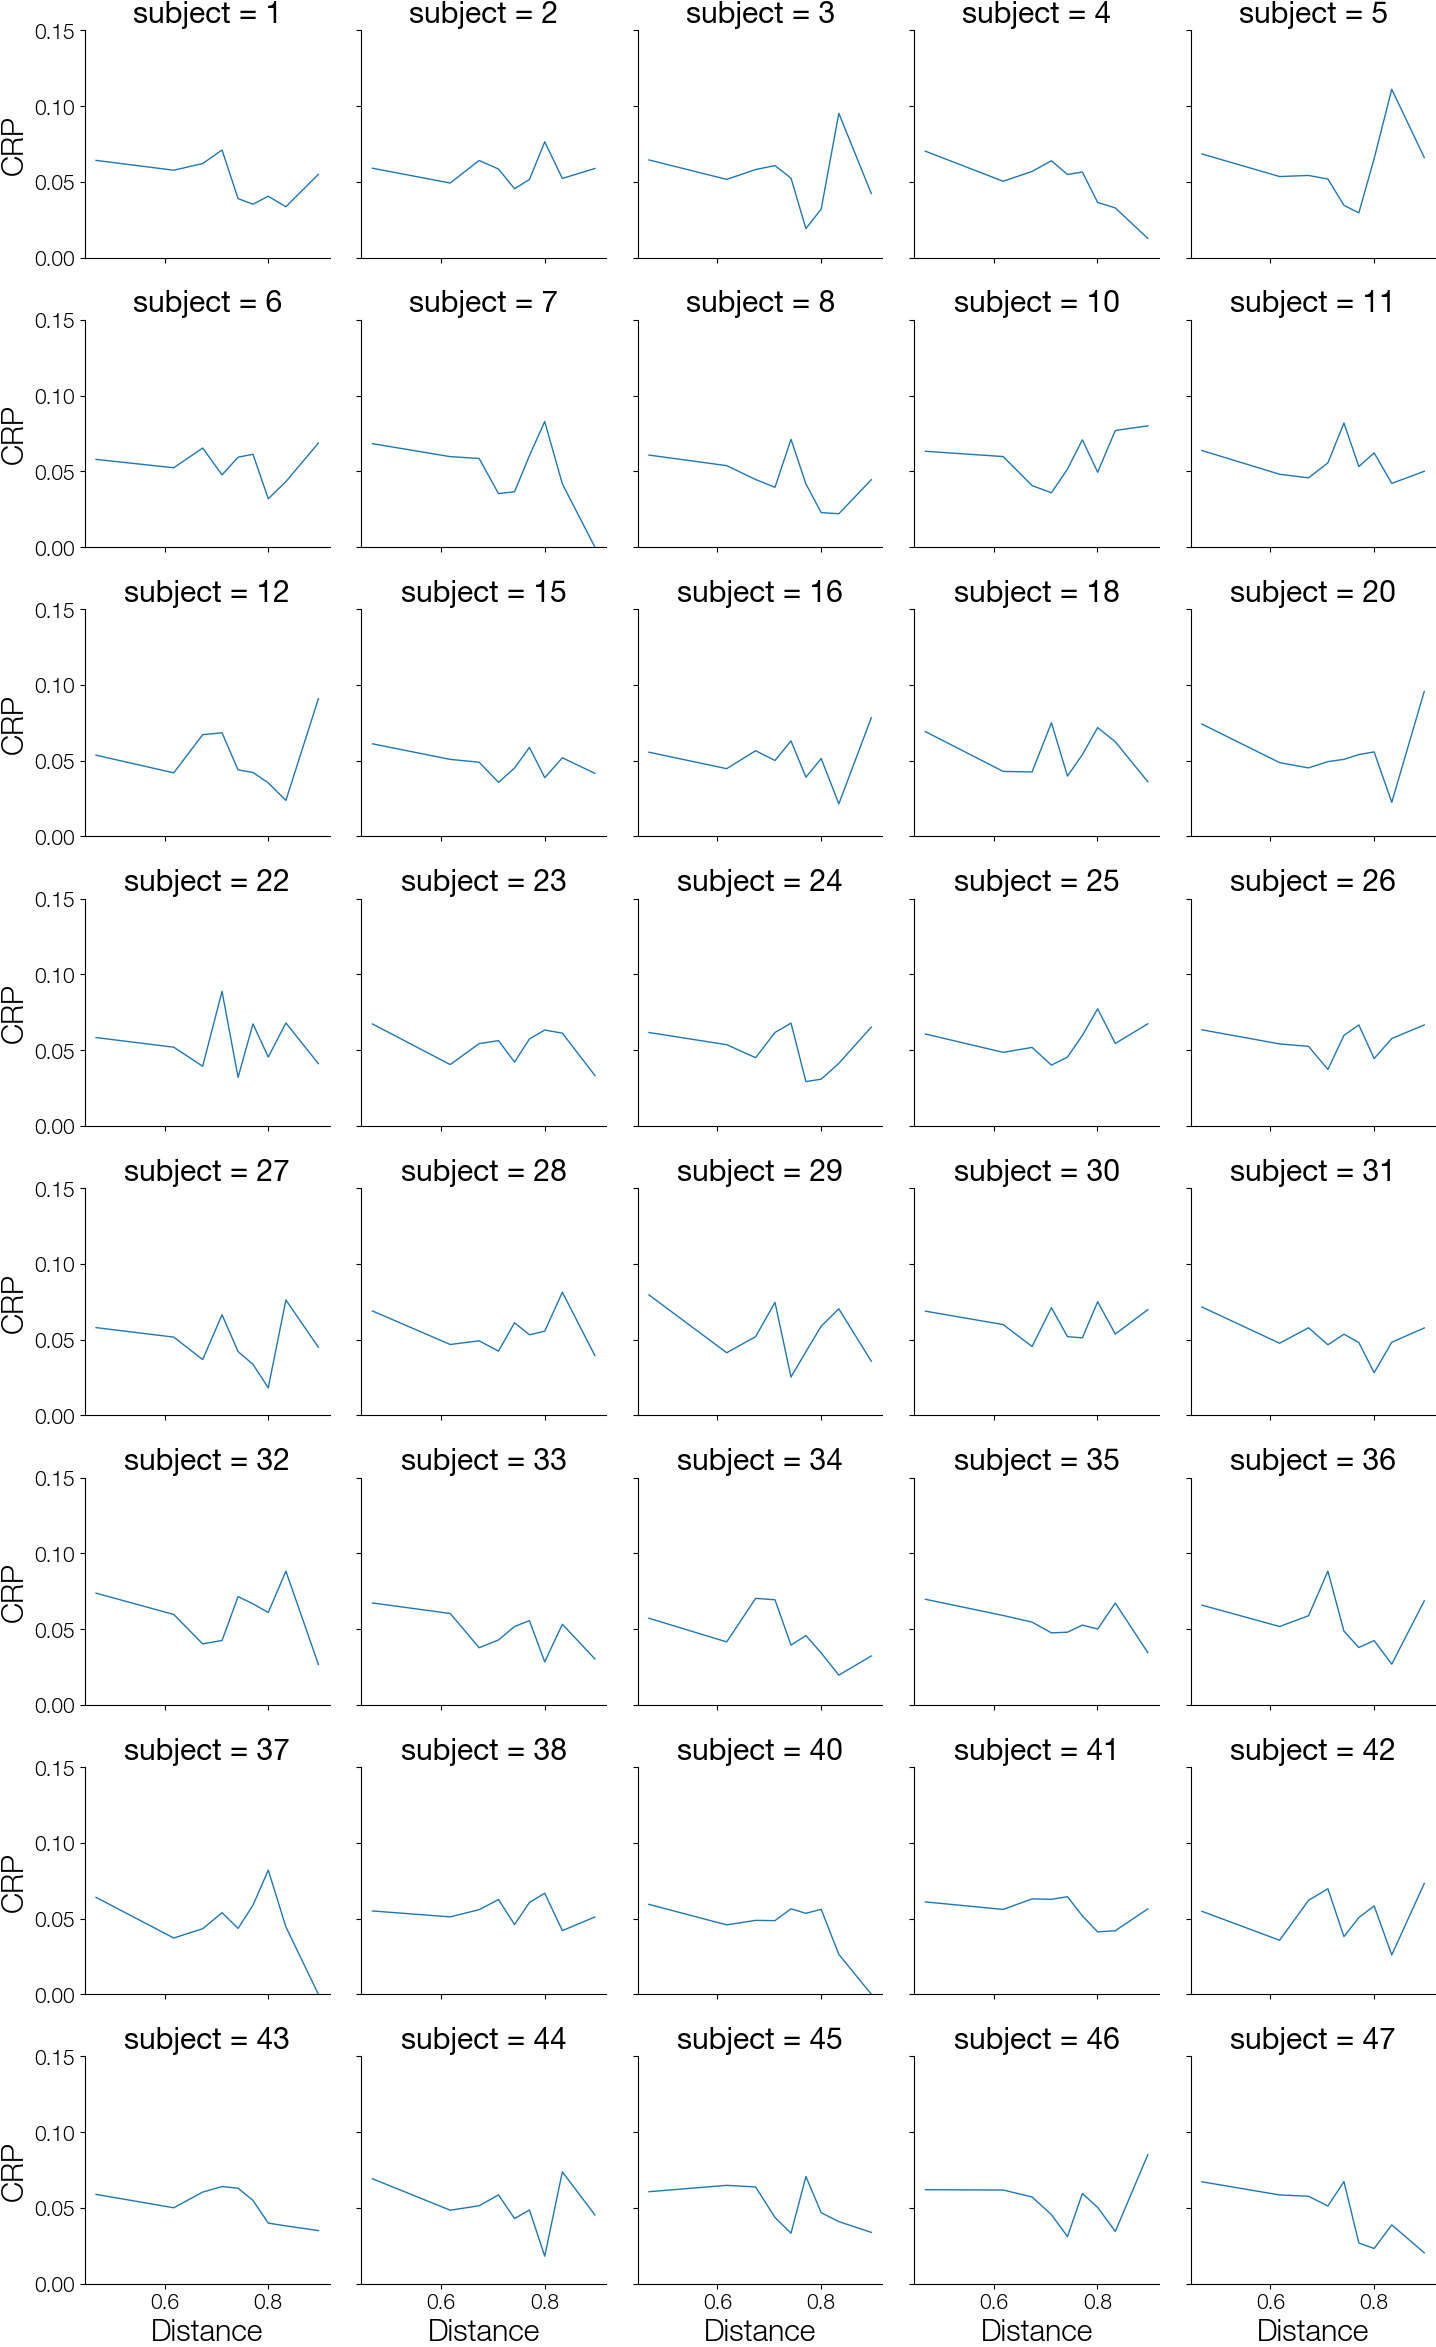

In [5]:
g = fr.plot_distance_crp(crp, min_samples=20, col="subject", col_wrap=5)
g.set(ylim=(0, 0.15));

For lists with mixed categories, separately examine within- and between-category transitions.

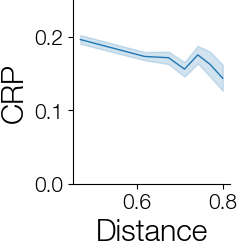

In [6]:
mixed = data.query("list_type == 'mixed'")
crp = fr.distance_crp(
    mixed, 
    "item_index", 
    distances, 
    edges, 
    test_key="category", 
    test=lambda x, y: x == y,
)
g = fr.plot_distance_crp(crp, min_samples=10)
g.set(ylim=(0, .25));

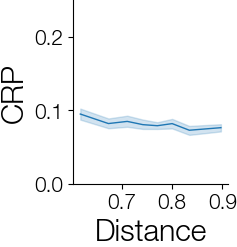

In [7]:
crp = fr.distance_crp(
    mixed, 
    "item_index", 
    distances, 
    edges, 
    test_key="category", 
    test=lambda x, y: x != y,
)
g = fr.plot_distance_crp(crp, min_samples=10)
g.set(ylim=(0, .25));

In [8]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

psifr  : 0.8.2
numpy  : 1.23.4
seaborn: 0.12.0

